# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [ ]:
!pip install scikit-learn --upgrade

In [ ]:
!pip install xgboost --upgrade

In [ ]:
!pip install imblearn --upgrade

<hr>

## Download dos conjuntos de dados em formato .csv

In [35]:
!pip3 install lightgbm --upgrade

     |████████████████████████████████| 1.0 MB 508 kB/s eta 0:00:01     |███▋                            | 112 kB 508 kB/s eta 0:00:02
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [36]:
import pandas as pd
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [4]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'train_dataset_algartech.csv')
df_training_dataset.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,...,80,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,...,80,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,...,80,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,...,80,1,20,3,3,3,2,2,0,Sim


In [5]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1370 entries, 0 to 1369
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       1370 non-null   int64 
 1   Local de trabalho                           1370 non-null   object
 2   Pontuação teste                             1370 non-null   int64 
 3   Departmento                                 1370 non-null   object
 4   Distancia casa-trabalho                     1370 non-null   int64 
 5   Educacao                                    1370 non-null   object
 6   Area                                        1370 non-null   object
 7   Possui carro                                1370 non-null   int64 
 8   Subordinado                                 1370 non-null   int64 
 9   Satisfação com o ambiente no emprego atual  1370 non-null   int64 
 10  Genero                  

In [6]:
df_training_dataset.nunique()

Idade                                           43
Local de trabalho                                3
Pontuação teste                                853
Departmento                                      3
Distancia casa-trabalho                         29
Educacao                                         5
Area                                             6
Possui carro                                     1
Subordinado                                   1370
Satisfação com o ambiente no emprego atual       4
Genero                                           2
Horas voluntariado                              71
Envolvimento com trabalho                        4
Posicao                                          5
Cargo                                            9
Satisfação com emprego                           4
Estado civil                                     3
Renda                                         1269
Bonus de performance                          1329
Quantidade de empresas que trab

# Atenção!

A coluna-alvo neste desafio é a coluna ``Contratar``

<hr>

## Pre-processando o dataset antes do treinamento

### Removendo todas as linhas que possuem algum valor nulos em determinadas colunas

Usando o método Pandas **DataFrame.dropna()** você pode remover todas as linhas nulas do dataset.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

In [7]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação DropNA: 

Idade                                         0
Local de trabalho                             0
Pontuação teste                               0
Departmento                                   0
Distancia casa-trabalho                       0
Educacao                                      0
Area                                          0
Possui carro                                  0
Subordinado                                   0
Satisfação com o ambiente no emprego atual    0
Genero                                        0
Horas voluntariado                            0
Envolvimento com trabalho                     0
Posicao                                       0
Cargo                                         0
Satisfação com emprego                        0
Estado civil                                  0
Renda                                         0
Bonus de performance                          0
Quantidade de empr

In [8]:
# Aplicando a função para deletar todas as linhas com valor NaN na coluna ``certificados'' e ``total_modulos'':
#df_training_dataset = df_training_dataset.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'])

In [8]:
# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação DropNA: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset após a transformação DropNA: 

Idade                                         0
Local de trabalho                             0
Pontuação teste                               0
Departmento                                   0
Distancia casa-trabalho                       0
Educacao                                      0
Area                                          0
Possui carro                                  0
Subordinado                                   0
Satisfação com o ambiente no emprego atual    0
Genero                                        0
Horas voluntariado                            0
Envolvimento com trabalho                     0
Posicao                                       0
Cargo                                         0
Satisfação com emprego                        0
Estado civil                                  0
Renda                                         0
Bonus de performance                          0
Quantidade de empres

### Processando valores NaN com o SimpleImputer do sklearn

Para os valores NaN, usaremos a substituição pela constante 0 como **exemplo**.

Você pode escolher a estratégia que achar melhor para tratar os valores nulos :)

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html?highlight=simpleimputer#sklearn.impute.SimpleImputer

In [9]:
from sklearn.impute import SimpleImputer
import numpy as np


impute_zeros = SimpleImputer(
    missing_values=np.nan,
    strategy='constant',
    fill_value=0,
    verbose=0,
    copy=True
)

In [10]:
# Exibindo os dados ausentes do conjunto de dados antes da primeira transformação (df)
print("Valores nulos no df_training_dataset antes da transformação SimpleImputer: \n\n{}\n".format(df_training_dataset.isnull().sum(axis = 0)))

# Aplicando a transformação ``SimpleImputer`` no conjunto de dados base
impute_zeros.fit(X=df_training_dataset)

# Reconstruindo um Pandas DataFrame com os resultados
df_training_dataset_imputed = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_training_dataset
    ),
    columns=df_training_dataset.columns
)

# Exibindo os dados ausentes do conjunto de dados após a primeira transformação (df)
print("Valores nulos no df_training_dataset após a transformação SimpleImputer: \n\n{}\n".format(df_training_dataset_imputed.isnull().sum(axis = 0)))

Valores nulos no df_training_dataset antes da transformação SimpleImputer: 

Idade                                         0
Local de trabalho                             0
Pontuação teste                               0
Departmento                                   0
Distancia casa-trabalho                       0
Educacao                                      0
Area                                          0
Possui carro                                  0
Subordinado                                   0
Satisfação com o ambiente no emprego atual    0
Genero                                        0
Horas voluntariado                            0
Envolvimento com trabalho                     0
Posicao                                       0
Cargo                                         0
Satisfação com emprego                        0
Estado civil                                  0
Renda                                         0
Bonus de performance                          0
Quantidade 

### Eliminando colunas indesejadas

Vamos **demonstrar** abaixo como usar o método **DataFrame.drop()**.

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html

In [11]:
df_training_dataset_imputed.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,1,2023,4,...,80,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,1,2027,1,...,80,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,1,2032,4,...,80,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,1,2044,2,...,80,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,1,2055,4,...,80,1,20,3,3,3,2,2,0,Sim


In [12]:
df_training_dataset_rmcolumns = df_training_dataset_imputed.drop(columns=['Possui carro', 'Horas de trabalho padrão', 'Maior de idade'], inplace=False)

In [13]:
df_training_dataset_rmcolumns.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,...,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,Contratar
1365,23,Misto,638,Vendas,9,Superior completo,Marketing,2023,4,M,...,1,1,1,3,2,1,0,1,0,Sim
1366,29,Misto,1092,Engenharia,1,Superior incompleto - cursando,Medicina,2027,1,M,...,2,3,4,3,4,2,2,2,2,Sim
1367,56,Cliente,310,Engenharia,7,Superior incompleto,Faculdade Técnica,2032,4,M,...,4,1,14,4,1,10,9,9,8,Sim
1368,50,Misto,878,Vendas,1,Superior incompleto - cursando,Ciências das natureza,2044,2,M,...,4,2,12,3,3,6,3,0,1,Sim
1369,50,Cliente,410,Vendas,28,Superior completo,Marketing,2055,4,M,...,2,1,20,3,3,3,2,2,0,Sim


# Atenção!

As colunas removidas acima são apenas para fim de exemplo, você pode usar as colunas que quiser e inclusive criar novas colunas com dados que achar importantes!


### Tratamento de de variáveis categóricas

Como mencionado antes, os computadores não são bons com variáveis "categóricas" (ou strings).

Dado uma coluna com variável categórica, o que podemos realizar é a codificação dessa coluna em múltiplas colunas contendo variáveis binárias. Esse processo é chamado de "one-hot-encoding" ou "dummy encoding". Se você não é familiarizado com esses termos, você pode pesquisar mais sobre isso na internet :)

In [15]:
# Tratando variáveis categóricas com o método Pandas ``get_dummies()''
# df_training = pd.get_dummies(df_training_dataset_rmcolumns, columns=['profissao'])
# df_training.tail()
df_training = df_training_dataset_rmcolumns.copy()

# Atenção!

A coluna **categoria** deve ser mantida como uma string. Você não precisa processar/codificar a variável-alvo.

<hr>

## Treinando um classificador com base em uma árvore de decisão

### Selecionando FEATURES e definindo a variável TARGET

In [16]:
df_training.columns

Index(['Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência', 'Contratar'],
      dtype='object')

In [46]:
features = df_training[
    [
        'Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência'
    ]
]
target = df_training['Contratar']  ## NÃO TROQUE O NOME DA VARIÁVEL TARGET.

features.rename(columns={"Aumento de salario%": "Aumento de salario",
                        "Pontuação teste": "Pontuacao teste",
                         "Satisfação com o ambiente no emprego atual": "Satisfacao com o ambiente no emprego atual",
                         "Satisfação com emprego": "Satisfacao com emprego",
                         "Satisfação com a relação": "Satisfacao com a relacao",
                         "Anos na última empresa": "Anos na ultima empresa",
                         "Anos na posição atual": "Anos na posicao atual",
                         "Anos desde última promoção": "Anos desde ultima promocao",
                         "Anos com a mesma gerência": "Anos com a mesma gerencia"}, inplace=True)

### Dividindo nosso conjunto de dados em conjuntos de treinamento e teste

In [47]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=133)

smc = SMOTENC(categorical_features=[1, 3, 5, 6, 9, 13, 15, 19], random_state=143)

X_train, y_train = smc.fit_resample(X_train, y_train)

### Treinando uma árvore de decisão

In [48]:
# Método para creacion de modelos basados en arbol de desición
# from sklearn.tree import DecisionTreeClassifier
X_train["Local de trabalho"] = X_train["Local de trabalho"].astype("category")
X_train["Departmento"] = X_train["Departmento"].astype("category")
X_train["Educacao"] = X_train["Educacao"].astype("category")
X_train["Area"] = X_train["Area"].astype("category")
X_train["Genero"] = X_train["Genero"].astype("category")
X_train["Cargo"] = X_train["Cargo"].astype("category")
X_train["Estado civil"] = X_train["Estado civil"].astype("category")
X_train["Necessita de hora extra"] = X_train["Necessita de hora extra"].astype("category")

In [49]:
X_train.dtypes

Idade                                            int64
Local de trabalho                             category
Pontuacao teste                                  int64
Departmento                                   category
Distancia casa-trabalho                          int64
Educacao                                      category
Area                                          category
Subordinado                                      int64
Satisfacao com o ambiente no emprego atual       int64
Genero                                        category
Horas voluntariado                               int64
Envolvimento com trabalho                        int64
Posicao                                          int64
Cargo                                         category
Satisfacao com emprego                           int64
Estado civil                                  category
Renda                                            int64
Bonus de performance                             int64
Quantidade

In [50]:
dtc = LGBMClassifier(learning_rate=0.001, n_estimators=10000)
dtc.fit(X_train, y_train, categorical_feature=["Local de trabalho", "Departmento", "Educacao", "Area", "Genero", "Cargo", "Estado civil", "Necessita de hora extra"])

/usr/local/lib/python3.7/site-packages/lightgbm/basic.py:1295: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Area', 'Cargo', 'Departmento', 'Educacao', 'Estado civil', 'Genero', 'Local de trabalho', 'Necessita de hora extra']
  # construct subset


LGBMClassifier(learning_rate=0.001, n_estimators=10000)

### Fazendo previsões na amostra de teste

In [51]:
X_test["Local de trabalho"] = X_test["Local de trabalho"].astype("category")
X_test["Departmento"] = X_test["Departmento"].astype("category")
X_test["Educacao"] = X_test["Educacao"].astype("category")
X_test["Area"] = X_test["Area"].astype("category")
X_test["Genero"] = X_test["Genero"].astype("category")
X_test["Cargo"] = X_test["Cargo"].astype("category")
X_test["Estado civil"] = X_test["Estado civil"].astype("category")
X_test["Necessita de hora extra"] = X_test["Necessita de hora extra"].astype("category")

y_pred = dtc.predict(X_test)
print(y_pred)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

['Sim' 'Não' 'Não' 'Não' 'Sim' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Sim' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não'
 'Não' 'Sim' 'Não' 'Sim' 'Não' 'Não' 'Não' 'Não' 'Não' 'Sim' 'Não' 'Não'
 'Não' 'Sim' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Sim' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Sim' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Sim' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Não' 'Sim' 'Não' 'Sim' 'Não' 'Não' 'Não' 'Não'
 'Sim' 'Não' 'Não' 'Não' 'Sim' 'Não' 'Sim' 'Não' 'Sim' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Sim' 'Não' 'Não' 'Não'
 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'Não' 'N

### Analisando a qualidade do modelo através da matriz de confusão

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import itertools


def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

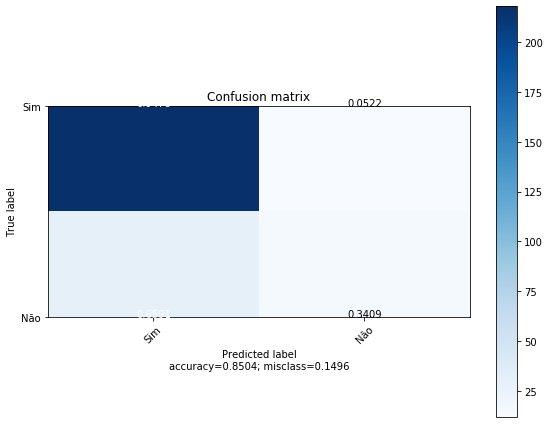

In [53]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['Sim', 'Não'])

<hr>

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [67]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'to_be_scored_algartech2.csv')
df_to_be_scored.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Possui carro,Subordinado,Satisfação com o ambiente no emprego atual,...,Satisfação com a relação,Horas de trabalho padrão,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
95,37,Cliente,504,Engenharia,10,Superior completo,Medicina,1,342,1,...,2,80,2,17,5,3,1,0,0,0
96,31,Misto,307,Engenharia,29,Superior incompleto,Medicina,1,355,3,...,2,80,0,6,2,4,5,4,1,4
97,28,Escritório,529,Engenharia,2,Superior incompleto - cursando,Ciências das natureza,1,364,1,...,3,80,0,5,5,1,0,0,0,0
98,47,Cliente,666,Engenharia,29,Superior incompleto - cursando,Ciências das natureza,1,376,1,...,4,80,1,10,2,2,10,7,9,9
99,44,Misto,920,Engenharia,24,Superior completo,Ciências das natureza,1,392,4,...,4,80,1,19,0,1,1,0,0,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [68]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Idade                                       100 non-null    int64 
 1   Local de trabalho                           99 non-null     object
 2   Pontuação teste                             100 non-null    int64 
 3   Departmento                                 100 non-null    object
 4   Distancia casa-trabalho                     100 non-null    int64 
 5   Educacao                                    100 non-null    object
 6   Area                                        100 non-null    object
 7   Possui carro                                100 non-null    int64 
 8   Subordinado                                 100 non-null    int64 
 9   Satisfação com o ambiente no emprego atual  100 non-null    int64 
 10  Genero                     

<hr>

# Atenção!

# Para poder aplicar seu modelo e classificar a folha de respostas, você precisa primeiro aplicar as mesmas transformações com colunas que você aplicou no dataset de treino.

# Não remova ou adicione linhas na folha de respostas. 

# Não altere a ordem das linhas na folha de respostas.

# Ao final, as 1000 entradas devem estar classificadas, com os valores previstos em uma coluna chamada "target"

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

In [69]:
# 1 - Removendo linhas com valores NaN em "certificados" e "total_modulos"
df_to_be_scored_1 = df_to_be_scored.copy()

# 2 - Inputando zeros nos valores faltantes
impute_zeros.fit(X=df_to_be_scored_1)
df_to_be_scored_2 = pd.DataFrame.from_records(
    data=impute_zeros.transform(
        X=df_to_be_scored_1
    ),
    columns=df_to_be_scored_1.columns
)

# 3 - Remoção de colunas
df_to_be_scored_3 = df_to_be_scored_2.drop(columns=['Possui carro', 'Horas de trabalho padrão', 'Maior de idade'], inplace=False)

# 4 - Encoding com "dummy variables"
# df_to_be_scored_4 = pd.get_dummies(df_to_be_scored_3, columns=['profissao'])
df_to_be_scored_4 = df_to_be_scored_3.copy()

df_to_be_scored_4["Local de trabalho"] = df_to_be_scored_4["Local de trabalho"].astype("category")
df_to_be_scored_4["Departmento"] = df_to_be_scored_4["Departmento"].astype("category")
df_to_be_scored_4["Educacao"] = df_to_be_scored_4["Educacao"].astype("category")
df_to_be_scored_4["Area"] = df_to_be_scored_4["Area"].astype("category")
df_to_be_scored_4["Genero"] = df_to_be_scored_4["Genero"].astype("category")
df_to_be_scored_4["Cargo"] = df_to_be_scored_4["Cargo"].astype("category")
df_to_be_scored_4["Estado civil"] = df_to_be_scored_4["Estado civil"].astype("category")
df_to_be_scored_4["Necessita de hora extra"] = df_to_be_scored_4["Necessita de hora extra"].astype("category")

df_to_be_scored_4.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,...,Performance na entrevista,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência
95,37,Cliente,504,Engenharia,10,Superior completo,Medicina,342,1,M,...,3,2,2,17,5,3,1,0,0,0
96,31,Misto,307,Engenharia,29,Superior incompleto,Medicina,355,3,M,...,3,2,0,6,2,4,5,4,1,4
97,28,Escritório,529,Engenharia,2,Superior incompleto - cursando,Ciências das natureza,364,1,M,...,3,3,0,5,5,1,0,0,0,0
98,47,Cliente,666,Engenharia,29,Superior incompleto - cursando,Ciências das natureza,376,1,M,...,3,4,1,10,2,2,10,7,9,9
99,44,Misto,920,Engenharia,24,Superior completo,Ciências das natureza,392,4,M,...,4,4,1,19,0,1,1,0,0,0


<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [70]:
df_training[
    [
        'Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência'
    ]
].columns

Index(['Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência'],
      dtype='object')

In [63]:
df_to_be_scored_4.columns

Index(['Idade', 'Local de trabalho', 'Pontuação teste', 'Departmento',
       'Distancia casa-trabalho', 'Educacao', 'Area', 'Subordinado',
       'Satisfação com o ambiente no emprego atual', 'Genero',
       'Horas voluntariado', 'Envolvimento com trabalho', 'Posicao', 'Cargo',
       'Satisfação com emprego', 'Estado civil', 'Renda',
       'Bonus de performance', 'Quantidade de empresas que trabalho',
       'Necessita de hora extra', 'Aumento de salario%',
       'Performance na entrevista', 'Satisfação com a relação', 'Beneficios',
       'Anos de experiencia', 'Horas de treinamento ultimo ano',
       'Estilo de vida', 'Anos na última empresa', 'Anos na posição atual',
       'Anos desde última promoção', 'Anos com a mesma gerência'],
      dtype='object')

# Atenção

Para todas colunas que não existirem no "df_to_be_scored", você pode usar a técnica abaixo para adicioná-las:

In [ ]:
#df_to_be_scored_4['profissao_0'] = 0

In [71]:
y_pred = dtc.predict(df_to_be_scored_4)
df_to_be_scored_4['target'] = y_pred
df_to_be_scored_4.tail()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,...,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,target
95,37,Cliente,504,Engenharia,10,Superior completo,Medicina,342,1,M,...,2,2,17,5,3,1,0,0,0,Não
96,31,Misto,307,Engenharia,29,Superior incompleto,Medicina,355,3,M,...,2,0,6,2,4,5,4,1,4,Não
97,28,Escritório,529,Engenharia,2,Superior incompleto - cursando,Ciências das natureza,364,1,M,...,3,0,5,5,1,0,0,0,0,Não
98,47,Cliente,666,Engenharia,29,Superior incompleto - cursando,Ciências das natureza,376,1,M,...,4,1,10,2,2,10,7,9,9,Não
99,44,Misto,920,Engenharia,24,Superior completo,Ciências das natureza,392,4,M,...,4,1,19,0,1,1,0,0,0,Não


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [82]:
#project.save_data(file_name="results.csv", data=df_to_be_scored_4.to_csv(index=False))
df_to_be_scored_4.rename(columns={"$Contratar": "$R-Contratar"}, inplace=True)
df_to_be_scored_4.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,...,Satisfação com a relação,Beneficios,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,$R-Contratar
0,40,Misto,444,Vendas,2,Superior incompleto,Marketing,1986,2,F,...,3,1,15,4,3,11,8,5,10,Não
1,25,Misto,309,RH,2,Superior completo,Ciências humanas,1987,3,F,...,3,0,6,3,3,2,0,1,2,Sim
2,30,Misto,911,Engenharia,1,Superior incompleto,Medicina,1989,4,M,...,3,0,12,6,2,12,8,1,7,Não
3,25,Misto,977,Engenharia,2,Médio completo,Outros,1992,4,M,...,3,1,7,2,2,2,2,0,2,Não
4,47,Escritório,1180,Engenharia,25,Superior completo,Medicina,1993,1,M,...,2,0,25,3,3,17,14,12,11,Não


In [83]:
df_to_be_scored_4.to_csv("results.csv", index=False)

In [92]:
dados = pd.read_csv("results.csv")
dados.head()

,Idade,Local de trabalho,Pontuação teste,Departmento,Distancia casa-trabalho,Educacao,Area,Subordinado,Satisfação com o ambiente no emprego atual,Genero,...,Anos de experiencia,Horas de treinamento ultimo ano,Estilo de vida,Anos na última empresa,Anos na posição atual,Anos desde última promoção,Anos com a mesma gerência,ADDED_COLUMN_1,$N-Contratar,$NC-Contratar
0,40,Misto,444,Vendas,2,Superior incompleto,Marketing,1986,2,F,...,15,4,3,11,8,5,10,NaN,Não,0.937390
1,25,Misto,309,RH,2,Superior completo,Ciências humanas,1987,3,F,...,6,3,3,2,0,1,2,NaN,Sim,0.998010
2,30,Misto,911,Engenharia,1,Superior incompleto,Medicina,1989,4,M,...,12,6,2,12,8,1,7,NaN,Não,0.982328
3,25,Misto,977,Engenharia,2,Médio completo,Outros,1992,4,M,...,7,2,2,2,2,0,2,NaN,Sim,0.966054
4,47,Escritório,1180,Engenharia,25,Superior completo,Medicina,1993,1,M,...,25,3,3,17,14,12,11,NaN,Não,0.980637


In [93]:
dados = dados.rename(columns={'$N-Contratar': '$R-Contratar', '$NC-Contratar': '$RC-Contratar'})

In [94]:
dados.to_csv("results.csv",index=False)

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
